In [70]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from random import choice

import networkx as nx
import numpy as np

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
from thinkstats2 import RandomSeed




In [76]:
def random_tree(n):
    G = nx.Graph()
    G.add_node(0)
    for node in range(1,n):
        edge_node = choice(G.nodes())
        G.add_node(node)
        G.add_edge(node,edge_node)
    return G
        
        

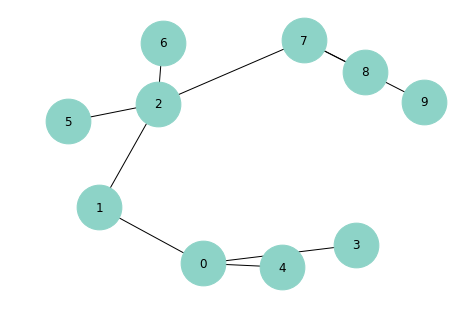

In [78]:

tree = random_tree(10)

nx.draw(tree, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)

[(1, 4, 8), (1, 8, 4), (3, 4, 8), (3, 8, 4), (4, 1, 8), (4, 3, 8), (4, 6, 9), (4, 8, 1), (4, 8, 3), (4, 9, 6), (6, 4, 9), (6, 9, 4), (8, 1, 4), (8, 3, 4), (8, 4, 1), (8, 4, 3), (9, 4, 6), (9, 6, 4)]


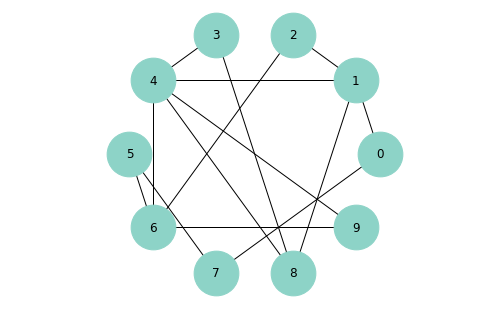

In [44]:
from numpy.random import random

def flip(p):
    return random() < p

def all_triangles(G):
    for node in G.nodes_iter():
        for neighbor in G.neighbors(node):
            for super_neighbor in G.neighbors(neighbor):
                if G.has_edge(super_neighbor, node):
                    yield node, neighbor, super_neighbor

def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v

def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

random_graph = make_random_graph(10, 0.3)
nx.draw_circular(random_graph, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
print(list(all_triangles(random_graph)))